In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

print("Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


In [2]:
# Load the datasets
# We use '../' to go up one folder level
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

# Look at the first few rows
train_df.head()

Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


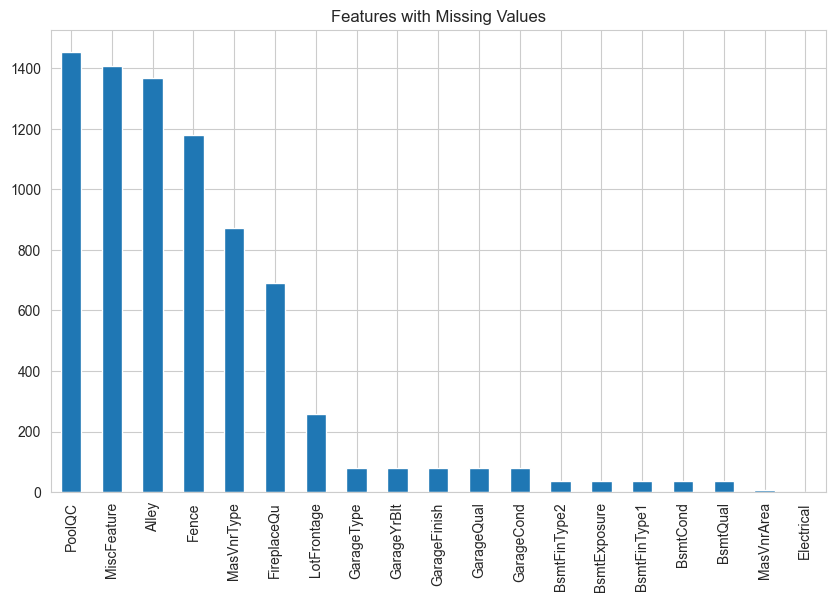

In [3]:
# Check for missing values
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(10, 6))
missing.plot(kind='bar')
plt.title("Features with Missing Values")
plt.show()

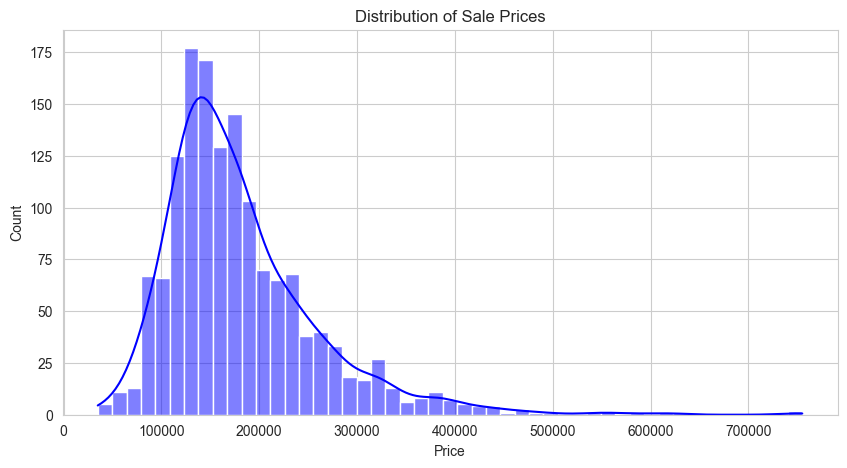

Skewness: 1.8828757597682129


In [4]:
# Visualize the distribution of SalePrice
plt.figure(figsize=(10, 5))
sns.histplot(train_df['SalePrice'], kde=True, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Price')
plt.show()

print(f"Skewness: {train_df['SalePrice'].skew()}")

In [5]:
def clean_data(df):
    df_clean = df.copy()
    
    # 1. Drop columns with >40% missing values
    threshold = 0.4 * len(df_clean)
    cols_to_drop = df_clean.columns[df_clean.isnull().sum() > threshold]
    df_clean = df_clean.drop(columns=cols_to_drop)
    print(f"Dropped columns: {list(cols_to_drop)}")
    
    # 2. Fill missing numeric values with median
    num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
        
    # 3. Fill missing categorical values with mode
    cat_cols = df_clean.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
        
    return df_clean

# Apply the cleaning
train_clean = clean_data(train_df)
test_clean = clean_data(test_df)

print(f"New Train Shape: {train_clean.shape}")

Dropped columns: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
Dropped columns: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
New Train Shape: (1460, 75)


In [6]:
# Convert categorical variables into dummy/indicator variables
# pd.get_dummies converts "KitchenQual" (Ex, Gd, Ta) into columns like "KitchenQual_Ex", "KitchenQual_Gd"
train_encoded = pd.get_dummies(train_clean, drop_first=True)

# Important: Separate features (X) and target (y)
X = train_encoded.drop('SalePrice', axis=1)
y = train_encoded['SalePrice']

print(f"Features shape: {X.shape}")

Features shape: (1460, 230)


In [7]:
from sklearn.model_selection import train_test_split

# Split: 80% for training, 20% for testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")

Training set: (1168, 230)
Validation set: (292, 230)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


RMSE (Root Mean Squared Error): $51,992.05
R² Score (Accuracy): 0.6476


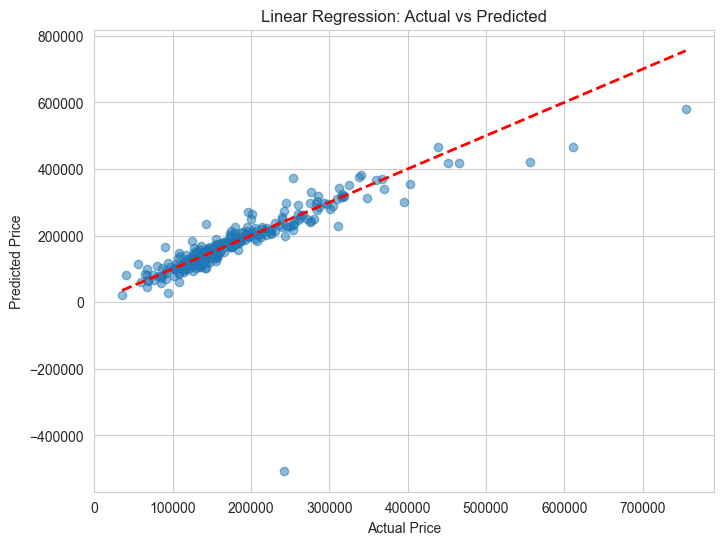

In [12]:

# Make predictions
y_pred = lr_model.predict(X_val)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"RMSE (Root Mean Squared Error): ${rmse:,.2f}")
print(f"R² Score (Accuracy): {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

In [16]:
import os
import joblib

# 1. Get the current location of this notebook
current_dir = os.getcwd()

# 2. Go up one level to the main project folder
project_root = os.path.dirname(current_dir)

# 3. Define the models folder path
models_dir = os.path.join(project_root, 'models')

# 4. Create the folder if it doesn't exist
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# --- MISSING LINE ADDED HERE ---
# Create the list of column names from your training data
model_columns = list(X.columns)
# -------------------------------

# 5. Save the files
joblib.dump(lr_model, os.path.join(models_dir, 'house_price_model.pkl'))
joblib.dump(model_columns, os.path.join(models_dir, 'model_columns.pkl'))

print("Model and columns saved.")

Model and columns saved.


In [18]:
import xgboost as xgb

# 1. Initialize the XGBoost Regressor
# n_estimators=1000: The number of trees to build (more is usually better, up to a point)
# learning_rate=0.05: How much each tree contributes
# n_jobs=-1: Use all CPU cores for speed
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, n_jobs=-1)

# 2. Train the model
print("Training XGBoost model... (this might take a few seconds)")
xgb_model.fit(X_train, y_train)

# 3. Predict on validation set
y_pred_xgb = xgb_model.predict(X_val)

# 4. Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
r2_xgb = r2_score(y_val, y_pred_xgb)

print("------------------------------------------------")
print(f"Linear Regression R²: {r2:.4f}")
print(f"XGBoost R² Score:     {r2_xgb:.4f}")
print("------------------------------------------------")

# 5. Improvement Check
if r2_xgb > r2:
    print(f"Accuracy improved by {(r2_xgb - r2)*100:.2f}%")
else:
    print("No improvement yet. Might need tuning.")

Training XGBoost model... (this might take a few seconds)
------------------------------------------------
Linear Regression R²: 0.6476
XGBoost R² Score:     0.9108
------------------------------------------------
Accuracy improved by 26.33%


In [ ]:
# Save the XGBoost model
joblib.dump(xgb_model, os.path.join(models_dir, 'xgb_model.pkl'))

# Save the column names 
joblib.dump(model_columns, os.path.join(models_dir, 'model_columns.pkl'))

print("XGBoost model saved successfully!")